In [2]:
import scanpy as sc
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

plt.rcParams['figure.figsize']=(3,3)

In [3]:
title="ctrl_ep"

path="/home/hpc/lianyun.huang/singlecell/final4"
path_data="/project/genomics/lianyun/CaIPACL/cp_from_homepath/data_final4"
pathout_qc=path+"/output/output_qc"
pathout_scanorama=path+"/output/output_scanorama"


path_sample1 = path_data + "/finalsoupx_sample" + "14" + ".h5ad"
path_sample2 = path_data + "/soupx_scrublet_sample" + "17" + ".h5ad"
path_sample3 = path_data + "/soupx_scrublet_sample" + "18" + ".h5ad"
path_sample4 = path_data + "/soupx_scrublet_sample" + "22" + ".h5ad"
path_sample5 = path_data + "/soupx_scrublet_sample" + "26" + ".h5ad"

path_sample6 = path_data + "/finalsoupx_sample" + "23" + ".h5ad"
path_sample7 = path_data + "/finalsoupx_sample" + "24" + ".h5ad"
path_sample8 = path_data + "/finalsoupx_sample" + "25" + ".h5ad"

In [4]:
sample1 = sc.read_h5ad(path_sample1)
sample2 = sc.read_h5ad(path_sample2)
sample3 = sc.read_h5ad(path_sample3)
sample4 = sc.read_h5ad(path_sample4)
sample5 = sc.read_h5ad(path_sample5)

sample6 = sc.read_h5ad(path_sample6)
sample7 = sc.read_h5ad(path_sample7)
sample8 = sc.read_h5ad(path_sample8)

sample1.obs["status"]="ctrl"
sample2.obs["status"]="ctrl"
sample3.obs["status"]="ctrl"
sample4.obs["status"]="ctrl"
sample5.obs["status"]="ctrl"

sample6.obs["status"]="ep"
sample7.obs["status"]="ep"
sample8.obs["status"]="ep"

adata = sample1.concatenate(sample2,sample3,sample4,sample5,sample6,sample7,sample8)
adata.obs=adata.obs.drop(["doublet","doublet_score"],axis=1)

adata

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


AnnData object with n_obs × n_vars = 12229 × 225
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'status', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells-2', 'n_cells_by_counts-3', 'mean_counts-3', 'log1p_mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'log1p_total_counts-3', 'n_cells-3', 'n_cells_by_counts-4', 'mean_counts-4', 'log1p_mean_counts-4', 'pct_dropout_by_counts-4'

### normalization

In [5]:
adata.X = adata.layers["soupX_counts"].copy()
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
adata.layers["logcounts"] = adata.X.copy()

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


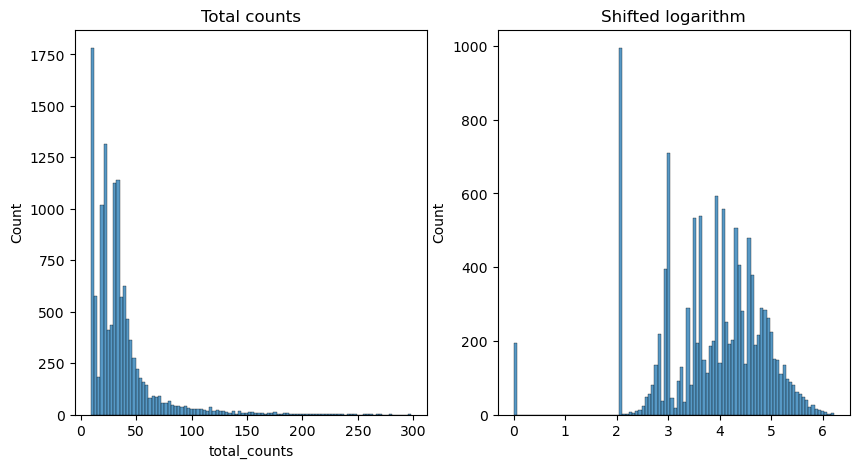

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sb.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sb.histplot(adata.layers["logcounts"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.savefig(pathout_qc+"/combine_normalization_"+title+".pdf")

plt.show()

### before batch correction

In [7]:
adata_nocorrection = adata.copy()

sc.pp.highly_variable_genes(adata_nocorrection)
sc.tl.pca(adata_nocorrection)
sc.pp.neighbors(adata_nocorrection)
sc.tl.umap(adata_nocorrection)
adata_nocorrection

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3

AnnData object with n_obs × n_vars = 12229 × 225
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'status', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells-2', 'n_cells_by_counts-3', 'mean_counts-3', 'log1p_mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'log1p_total_counts-3', 'n_cells-3', 'n_cells_by_counts-4', 'mean_counts-4', 'log1p_mean_counts-4', 'pct_dropout_by_counts-4'

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


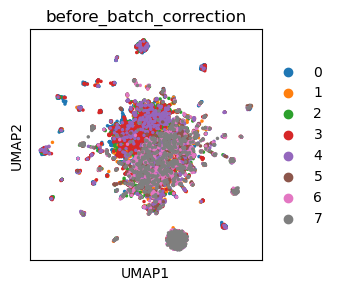

In [8]:
with plt.rc_context():  # Use this to set figure params like size and dpi
    sc.pl.umap(adata_nocorrection,color="batch",size=25,title="before_batch_correction",show=False)
    plt.savefig(pathout_scanorama+"/batchbefore_"+title+".pdf", bbox_inches="tight")

### scanorama

In [9]:
batch1 = adata[adata.obs["batch"] == "0", :]
batch2 = adata[adata.obs["batch"] == "1", :]
batch3 = adata[adata.obs["batch"] == "2", :]
batch4 = adata[adata.obs["batch"] == "3", :]
batch5 = adata[adata.obs["batch"] == "4", :]

batch6 = adata[adata.obs["batch"] == "5", :]
batch7 = adata[adata.obs["batch"] == "6", :]
batch8 = adata[adata.obs["batch"] == "7", :]

split = [batch1,batch2,batch3,batch4,batch5,batch6,batch7,batch8]

In [10]:
def runScanorama(adata, hvg = None):
    import scanorama
    corrected = scanorama.correct_scanpy(split, return_dimred=True)
    corrected = corrected[0].concatenate(corrected[1:])
    return corrected

In [11]:
adata_scanorama=runScanorama(adata,hvg=None)

Found 225 genes among all datasets
[[0.         0.38828389 0.39279009 0.55839279 0.41757416 0.51147228
  0.52781065 0.43680485]
 [0.         0.         0.59868813 0.54025045 0.51785714 0.43690249
  0.39526627 0.31445905]
 [0.         0.         0.         0.60012399 0.55612245 0.45506692
  0.41893491 0.34883721]
 [0.         0.         0.         0.         0.6122449  0.52963671
  0.49349112 0.45500506]
 [0.         0.         0.         0.         0.         0.67017208
  0.62721893 0.55106168]
 [0.         0.         0.         0.         0.         0.
  0.76804734 0.70778564]
 [0.         0.         0.         0.         0.         0.
  0.         0.76238625]
 [0.         0.         0.         0.         0.         0.
  0.         0.        ]]
Processing datasets (5, 6)
Processing datasets (6, 7)
Processing datasets (5, 7)
Processing datasets (4, 5)
Processing datasets (4, 6)
Processing datasets (3, 4)
Processing datasets (2, 3)
Processing datasets (1, 2)
Processing datasets (0, 3)
P

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(


In [12]:
sc.pp.highly_variable_genes(adata_scanorama)
sc.tl.pca(adata_scanorama)
sc.pp.neighbors(adata_scanorama)
sc.tl.umap(adata_scanorama)

/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:208: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)


/home/hpc/lianyun.huang/anaconda3/envs/xyb/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


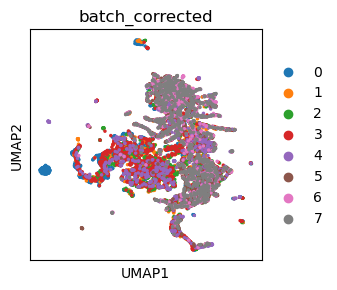

In [13]:
with plt.rc_context():  # Use this to set figure params like size and dpi
    sc.pl.umap(adata_scanorama,color="batch",size=25,title="batch_corrected",show=False)
    plt.savefig(pathout_scanorama+"/batchafter_"+title+".pdf", bbox_inches="tight")

In [14]:
# move visualiztion components into adata
adata.var['highly_variable']=adata_scanorama.var['highly_variable']
adata.var['means']=adata_scanorama.var['means']
adata.var['dispersions']=adata_scanorama.var['dispersions']
adata.var['dispersions_norm']=adata_scanorama.var['dispersions_norm']
adata.uns['hvg']=adata_scanorama.uns['hvg']
adata.uns['pca']=adata_scanorama.uns['pca']
adata.uns['neighbors']=adata_scanorama.uns['neighbors']
adata.uns['umap']=adata_scanorama.uns['umap']
adata.uns['batch_colors']=adata_scanorama.uns['batch_colors']
adata.obsm['X_scanorama']=adata_scanorama.obsm['X_scanorama']
adata.obsm['X_pca']=adata_scanorama.obsm['X_pca']
adata.obsm['X_umap']=adata_scanorama.obsm['X_umap']
adata.varm['PCs']=adata_scanorama.varm['PCs']
adata.obsp['distances'] = adata_scanorama.obsp['distances']
adata.obsp['connectivities'] = adata_scanorama.obsp['connectivities']

In [15]:
adata.X=adata.layers["soupX_counts"].copy()

In [16]:
adata.write(path_data+"/combine_"+title+".h5ad")

In [17]:
print(title)
print(adata.obs["status"].cat.categories)
adata

ctrl_ep
Index(['ctrl', 'ep'], dtype='object')


AnnData object with n_obs × n_vars = 12229 × 225
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'outlier', 'mt_outlier', 'status', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts-0', 'mean_counts-0', 'log1p_mean_counts-0', 'pct_dropout_by_counts-0', 'total_counts-0', 'log1p_total_counts-0', 'n_cells-0', 'n_cells_by_counts-1', 'mean_counts-1', 'log1p_mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'log1p_total_counts-1', 'n_cells-1', 'n_cells_by_counts-2', 'mean_counts-2', 'log1p_mean_counts-2', 'pct_dropout_by_counts-2', 'total_counts-2', 'log1p_total_counts-2', 'n_cells-2', 'n_cells_by_counts-3', 'mean_counts-3', 'log1p_mean_counts-3', 'pct_dropout_by_counts-3', 'total_counts-3', 'log1p_total_counts-3', 'n_cells-3', 'n_cells_by_counts-4', 'mean_counts-4', 'log1p_mean_counts-4', 'pct_dropout_by_counts-4'